In [ ]:

# Initial exploration of the working directory
import os
import pandas as pd
import numpy as np
import json

# List all files in the current working directory
print("Current working directory:", os.getcwd())
print("\nFiles in working directory:")
for file in os.listdir('.'):
    if os.path.isfile(file):
        size = os.path.getsize(file)
        print(f"  - {file} ({size:,} bytes)")


Current working directory: /storage/trajectory_data

Files in working directory:
  - Surface-Plasmon-Resonance-Adaptyv-Bio-Docs.pdf (213,333 bytes)
  - 2VSM.pdb (476,928 bytes)
  - notebook.ipynb (2,351 bytes)


In [ ]:

# Examine the PDB file (protein structure file)
print("="*80)
print("EXAMINING: 2VSM.pdb")
print("="*80)

# Read first 100 lines to understand structure
with open('2VSM.pdb', 'r') as f:
    lines = f.readlines()
    
print(f"Total lines in PDB file: {len(lines)}")
print(f"\nFirst 50 lines:")
print("".join(lines[:50]))


EXAMINING: 2VSM.pdb
Total lines in PDB file: 5888

First 50 lines:
HEADER    HYDROLASE                               25-APR-08   2VSM              
TITLE     NIPAH VIRUS ATTACHMENT GLYCOPROTEIN IN COMPLEX WITH HUMAN CELL SURFACE
TITLE    2 RECEPTOR EPHRINB2                                                    
CAVEAT     2VSM    HIS B 170 HAS WRONG CHIRALITY AT ATOM CA                     
COMPND    MOL_ID: 1;                                                            
COMPND   2 MOLECULE: HEMAGGLUTININ-NEURAMINIDASE;                               
COMPND   3 CHAIN: A;                                                            
COMPND   4 FRAGMENT: B-PROPELLER, EPHRIN BINDING DOMAIN, RESIDUES 188-602;      
COMPND   5 SYNONYM: NIV-G;                                                      
COMPND   6 EC: 3.2.1.18;                                                        
COMPND   7 ENGINEERED: YES;                                                     
COMPND   8 OTHER_DETAILS: N-ACETYLGLUCOSAM

In [ ]:

# Continue examining PDB file structure - look at the end and count record types
print("Last 30 lines of PDB file:")
print("".join(lines[-30:]))

print("\n" + "="*80)
print("PDB RECORD TYPE COUNTS")
print("="*80)

# Count different record types in PDB file
record_types = {}
for line in lines:
    if len(line) >= 6:
        record_type = line[:6].strip()
        record_types[record_type] = record_types.get(record_type, 0) + 1

# Sort by count descending
for record, count in sorted(record_types.items(), key=lambda x: x[1], reverse=True):
    print(f"{record:15s}: {count:6d}")


Last 30 lines of PDB file:
CONECT 4542 2400 4543 4553                                                      
CONECT 4543 4542 4544 4550                                                      
CONECT 4544 4543 4545 4551                                                      
CONECT 4545 4544 4546 4552                                                      
CONECT 4546 4545 4547 4553                                                      
CONECT 4547 4546 4554                                                           
CONECT 4548 4549 4550 4555                                                      
CONECT 4549 4548                                                                
CONECT 4550 4543 4548                                                           
CONECT 4551 4544                                                                
CONECT 4552 4545                                                                
CONECT 4553 4542 4546                                                           
C

In [ ]:

# Parse PDB file to extract detailed information about the structure
from Bio import PDB
import warnings
warnings.filterwarnings('ignore')

# Try to use BioPython to parse the PDB file
try:
    parser = PDB.PDBParser(QUIET=True)
    structure = parser.get_structure('2VSM', '2VSM.pdb')
    
    print("="*80)
    print("PDB STRUCTURE DETAILS (using BioPython)")
    print("="*80)
    
    # Get basic structure info
    print(f"\nStructure ID: {structure.id}")
    print(f"Number of models: {len(list(structure.get_models()))}")
    
    for model in structure:
        print(f"\nModel ID: {model.id}")
        print(f"Number of chains: {len(list(model.get_chains()))}")
        
        for chain in model:
            residues = list(chain.get_residues())
            atoms = list(chain.get_atoms())
            print(f"\n  Chain {chain.id}:")
            print(f"    Number of residues: {len(residues)}")
            print(f"    Number of atoms: {len(atoms)}")
            
            # Get residue types
            residue_types = {}
            for res in residues:
                res_name = res.get_resname()
                residue_types[res_name] = residue_types.get(res_name, 0) + 1
            
            print(f"    Unique residue types: {len(residue_types)}")
            
            # Show first few residues
            print(f"    First 10 residues: {[r.get_resname() for r in residues[:10]]}")
            print(f"    Last 10 residues: {[r.get_resname() for r in residues[-10:]]}")
            
except ImportError:
    print("BioPython not installed. Installing...")
    import subprocess
    subprocess.run(['pip', 'install', 'biopython'], check=True)
    print("BioPython installed successfully. Please re-run this cell.")


PDB STRUCTURE DETAILS (using BioPython)

Structure ID: 2VSM
Number of models: 1

Model ID: 0
Number of chains: 2

  Chain A:
    Number of residues: 917
    Number of atoms: 3815
    Unique residue types: 23
    First 10 residues: ['ILE', 'CYS', 'LEU', 'GLN', 'LYS', 'THR', 'SER', 'ASN', 'GLN', 'ILE']
    Last 10 residues: ['HOH', 'HOH', 'HOH', 'HOH', 'HOH', 'HOH', 'HOH', 'HOH', 'HOH', 'HOH']

  Chain B:
    Number of residues: 343
    Number of atoms: 1323
    Unique residue types: 22
    First 10 residues: ['ILE', 'VAL', 'LEU', 'GLU', 'PRO', 'ILE', 'TYR', 'TRP', 'ASN', 'SER']
    Last 10 residues: ['HOH', 'HOH', 'HOH', 'HOH', 'HOH', 'HOH', 'HOH', 'HOH', 'HOH', 'HOH']


In [ ]:

# Extract more detailed information about the PDB structure
print("="*80)
print("DETAILED RESIDUE COMPOSITION")
print("="*80)

for model in structure:
    for chain in model:
        residues = list(chain.get_residues())
        
        # Separate protein residues from hetero residues
        protein_residues = []
        hetero_residues = []
        water_residues = []
        
        for res in residues:
            res_id = res.get_id()
            res_name = res.get_resname()
            
            if res_name == 'HOH':
                water_residues.append(res)
            elif res_id[0] == ' ':  # Standard amino acid
                protein_residues.append(res)
            else:  # Hetero atom (ligand, modified residue, etc.)
                hetero_residues.append(res)
        
        print(f"\nChain {chain.id}:")
        print(f"  Protein residues: {len(protein_residues)}")
        print(f"  Hetero residues (ligands/modifications): {len(hetero_residues)}")
        print(f"  Water molecules: {len(water_residues)}")
        
        # Count amino acid types
        if protein_residues:
            aa_counts = {}
            for res in protein_residues:
                aa = res.get_resname()
                aa_counts[aa] = aa_counts.get(aa, 0) + 1
            
            print(f"\n  Amino acid composition:")
            for aa, count in sorted(aa_counts.items()):
                print(f"    {aa}: {count}")
        
        # List hetero residue types
        if hetero_residues:
            print(f"\n  Hetero residue types:")
            hetero_types = {}
            for res in hetero_residues:
                res_name = res.get_resname()
                hetero_types[res_name] = hetero_types.get(res_name, 0) + 1
            for het, count in sorted(hetero_types.items()):
                print(f"    {het}: {count}")


DETAILED RESIDUE COMPOSITION

Chain A:
  Protein residues: 413
  Hetero residues (ligands/modifications): 4
  Water molecules: 500

  Amino acid composition:
    ALA: 15
    ARG: 18
    ASN: 29
    ASP: 20
    CYS: 14
    GLN: 17
    GLU: 17
    GLY: 28
    HIS: 5
    ILE: 30
    LEU: 34
    LYS: 22
    MET: 7
    PHE: 17
    PRO: 24
    SER: 35
    THR: 24
    TRP: 7
    TYR: 21
    VAL: 29

  Hetero residue types:
    IPA: 1
    NAG: 3

Chain B:
  Protein residues: 137
  Hetero residues (ligands/modifications): 1
  Water molecules: 205

  Amino acid composition:
    ALA: 3
    ARG: 2
    ASN: 8
    ASP: 10
    CYS: 4
    GLN: 9
    GLU: 7
    GLY: 10
    HIS: 2
    ILE: 11
    LEU: 12
    LYS: 14
    MET: 3
    PHE: 5
    PRO: 7
    SER: 7
    THR: 5
    TRP: 2
    TYR: 8
    VAL: 8

  Hetero residue types:
    NAG: 1


In [ ]:

# Extract atomic coordinates and calculate basic geometric properties
print("="*80)
print("ATOMIC COORDINATE STATISTICS")
print("="*80)

for model in structure:
    for chain in model:
        protein_residues = [res for res in chain.get_residues() if res.get_id()[0] == ' ']
        
        if protein_residues:
            # Get all atom coordinates
            coords = []
            for res in protein_residues:
                for atom in res.get_atoms():
                    coords.append(atom.get_coord())
            
            coords = np.array(coords)
            
            print(f"\nChain {chain.id}:")
            print(f"  Total protein atoms: {len(coords)}")
            print(f"\n  Coordinate ranges (Å):")
            print(f"    X: [{coords[:, 0].min():.2f}, {coords[:, 0].max():.2f}] (range: {coords[:, 0].max() - coords[:, 0].min():.2f})")
            print(f"    Y: [{coords[:, 1].min():.2f}, {coords[:, 1].max():.2f}] (range: {coords[:, 1].max() - coords[:, 1].min():.2f})")
            print(f"    Z: [{coords[:, 2].min():.2f}, {coords[:, 2].max():.2f}] (range: {coords[:, 2].max() - coords[:, 2].min():.2f})")
            
            print(f"\n  Coordinate statistics:")
            print(f"    Mean: [{coords[:, 0].mean():.2f}, {coords[:, 1].mean():.2f}, {coords[:, 2].mean():.2f}]")
            print(f"    Std:  [{coords[:, 0].std():.2f}, {coords[:, 1].std():.2f}, {coords[:, 2].std():.2f}]")


ATOMIC COORDINATE STATISTICS

Chain A:
  Total protein atoms: 3269

  Coordinate ranges (Å):
    X: [-13.22, 46.93] (range: 60.15)
    Y: [35.94, 96.79] (range: 60.84)
    Z: [-44.78, 8.01] (range: 52.79)

  Coordinate statistics:
    Mean: [17.17, 64.53, -18.23]
    Std:  [13.05, 12.22, 10.35]

Chain B:
  Total protein atoms: 1104

  Coordinate ranges (Å):
    X: [11.20, 49.38] (range: 38.18)
    Y: [35.80, 78.77] (range: 42.97)
    Z: [-62.84, -27.03] (range: 35.81)

  Coordinate statistics:
    Mean: [31.75, 59.66, -46.13]
    Std:  [8.75, 9.33, 6.97]


In [ ]:

# Extract B-factor (temperature factor) information
print("="*80)
print("B-FACTOR (TEMPERATURE FACTOR) STATISTICS")
print("="*80)

for model in structure:
    for chain in model:
        protein_residues = [res for res in chain.get_residues() if res.get_id()[0] == ' ']
        
        if protein_residues:
            # Get B-factors for all protein atoms
            bfactors = []
            for res in protein_residues:
                for atom in res.get_atoms():
                    bfactors.append(atom.get_bfactor())
            
            bfactors = np.array(bfactors)
            
            print(f"\nChain {chain.id}:")
            print(f"  Mean B-factor: {bfactors.mean():.2f}")
            print(f"  Median B-factor: {np.median(bfactors):.2f}")
            print(f"  Std B-factor: {bfactors.std():.2f}")
            print(f"  Min B-factor: {bfactors.min():.2f}")
            print(f"  Max B-factor: {bfactors.max():.2f}")
            print(f"  25th percentile: {np.percentile(bfactors, 25):.2f}")
            print(f"  75th percentile: {np.percentile(bfactors, 75):.2f}")


B-FACTOR (TEMPERATURE FACTOR) STATISTICS

Chain A:
  Mean B-factor: 14.16
  Median B-factor: 11.05
  Std B-factor: 10.30
  Min B-factor: 2.00
  Max B-factor: 72.54
  25th percentile: 7.59
  75th percentile: 16.61

Chain B:
  Mean B-factor: 15.92
  Median B-factor: 12.11
  Std B-factor: 10.93
  Min B-factor: 2.86
  Max B-factor: 66.83
  25th percentile: 8.76
  75th percentile: 18.77


In [ ]:

# Parse PDB header information to extract metadata
print("="*80)
print("PDB HEADER INFORMATION")
print("="*80)

# Extract key header information
header_info = {
    'HEADER': [],
    'TITLE': [],
    'COMPND': [],
    'SOURCE': [],
    'KEYWDS': [],
    'EXPDTA': [],
    'AUTHOR': [],
    'JRNL': [],
    'REMARK': []
}

for line in lines:
    record = line[:6].strip()
    if record in header_info:
        content = line[10:].strip()
        if content:
            header_info[record].append(content)

# Print selected header information
print("\nHEADER:")
for item in header_info['HEADER']:
    print(f"  {item}")

print("\nTITLE:")
for item in header_info['TITLE']:
    print(f"  {item}")

print("\nCOMPOUND (COMPND):")
for item in header_info['COMPND'][:10]:  # First 10 lines
    print(f"  {item}")

print("\nSOURCE:")
for item in header_info['SOURCE'][:10]:  # First 10 lines
    print(f"  {item}")

print("\nKEYWORDS:")
for item in header_info['KEYWDS']:
    print(f"  {item}")

print("\nEXPERIMENTAL DATA:")
for item in header_info['EXPDTA']:
    print(f"  {item}")

print("\nAUTHOR:")
for item in header_info['AUTHOR']:
    print(f"  {item}")


PDB HEADER INFORMATION

HEADER:
  HYDROLASE                               25-APR-08   2VSM

TITLE:
  NIPAH VIRUS ATTACHMENT GLYCOPROTEIN IN COMPLEX WITH HUMAN CELL SURFACE
  RECEPTOR EPHRINB2

COMPOUND (COMPND):
  MOL_ID: 1;
  MOLECULE: HEMAGGLUTININ-NEURAMINIDASE;
  CHAIN: A;
  FRAGMENT: B-PROPELLER, EPHRIN BINDING DOMAIN, RESIDUES 188-602;
  SYNONYM: NIV-G;
  EC: 3.2.1.18;
  ENGINEERED: YES;
  OTHER_DETAILS: N-ACETYLGLUCOSAMINE LINKAGES OBSERVED IN;
  MOL_ID: 2;
  MOLECULE: EPHRIN-B2;

SOURCE:
  MOL_ID: 1;
  ORGANISM_SCIENTIFIC: NIPAH VIRUS;
  ORGANISM_TAXID: 121791;
  EXPRESSION_SYSTEM: HOMO SAPIENS;
  EXPRESSION_SYSTEM_TAXID: 9606;
  EXPRESSION_SYSTEM_CELL_LINE: HEK293T;
  EXPRESSION_SYSTEM_PLASMID: PHLSEC;
  OTHER_DETAILS: SYNTHETICALLY OPTIMIZED CDNA (GENEART);
  MOL_ID: 2;
  ORGANISM_SCIENTIFIC: HOMO SAPIENS;

KEYWORDS:
  DEVELOPMENTAL PROTEIN, HENIPAVIRUS, NEUROGENESIS, GLYCOPROTEIN,
  PARAMYXOVIRUS, ENVELOPE PROTEIN, CELL SURFACE RECEPTOR, HENDRA,
  VIRION, EPHRIN, COMPLEX, ME

In [ ]:

# Extract resolution and refinement information from REMARK records
print("="*80)
print("RESOLUTION AND REFINEMENT STATISTICS")
print("="*80)

# Look for REMARK 2 (resolution) and REMARK 3 (refinement statistics)
resolution = None
refinement_stats = {}

for i, line in enumerate(lines):
    if line.startswith('REMARK   2 RESOLUTION'):
        # Extract resolution value
        parts = line.split()
        if len(parts) >= 4:
            try:
                resolution = float(parts[3])
            except ValueError:
                pass
    
    if line.startswith('REMARK   3'):
        content = line[11:].strip()
        if content:
            # Extract key refinement statistics
            if 'R VALUE' in content and 'WORK' in content:
                parts = content.split(':')
                if len(parts) >= 2:
                    try:
                        refinement_stats['R_work'] = float(parts[1].strip())
                    except ValueError:
                        pass
            elif 'FREE R VALUE' in content:
                parts = content.split(':')
                if len(parts) >= 2:
                    try:
                        refinement_stats['R_free'] = float(parts[1].strip())
                    except ValueError:
                        pass

print(f"\nResolution: {resolution} Å" if resolution else "\nResolution: Not found")

print("\nRefinement Statistics:")
for key, value in refinement_stats.items():
    print(f"  {key}: {value}")

# Look for specific REMARK 2 and REMARK 3 sections
print("\n" + "-"*80)
print("REMARK 2 - RESOLUTION")
print("-"*80)
for line in lines:
    if line.startswith('REMARK   2'):
        print(line.rstrip())
        
print("\n" + "-"*80)
print("REMARK 3 - REFINEMENT (First 50 lines)")
print("-"*80)
remark3_count = 0
for line in lines:
    if line.startswith('REMARK   3'):
        print(line.rstrip())
        remark3_count += 1
        if remark3_count >= 50:
            break


RESOLUTION AND REFINEMENT STATISTICS

Resolution: 1.8 Å

Refinement Statistics:
  R_work: 0.197
  R_free: 0.115

--------------------------------------------------------------------------------
REMARK 2 - RESOLUTION
--------------------------------------------------------------------------------
REMARK   2
REMARK   2 RESOLUTION.    1.80 ANGSTROMS.

--------------------------------------------------------------------------------
REMARK 3 - REFINEMENT (First 50 lines)
--------------------------------------------------------------------------------
REMARK   3
REMARK   3 REFINEMENT.
REMARK   3   PROGRAM     : REFMAC 5.2.0019
REMARK   3   AUTHORS     : MURSHUDOV,SKUBAK,LEBEDEV,PANNU,STEINER,
REMARK   3               : NICHOLLS,WINN,LONG,VAGIN
REMARK   3
REMARK   3    REFINEMENT TARGET : MAXIMUM LIKELIHOOD
REMARK   3
REMARK   3  DATA USED IN REFINEMENT.
REMARK   3   RESOLUTION RANGE HIGH (ANGSTROMS) : 1.80
REMARK   3   RESOLUTION RANGE LOW  (ANGSTROMS) : 30.00
REMARK   3   DATA CUTOFF       

In [ ]:

# Extract secondary structure information
print("="*80)
print("SECONDARY STRUCTURE INFORMATION")
print("="*80)

# Count helices and sheets
helix_count = 0
sheet_count = 0

helix_info = []
sheet_info = []

for line in lines:
    if line.startswith('HELIX'):
        helix_count += 1
        # Parse helix information
        helix_id = line[11:14].strip()
        chain1 = line[19:20].strip()
        start_res = line[21:25].strip()
        chain2 = line[31:32].strip()
        end_res = line[33:37].strip()
        helix_class = line[38:40].strip()
        length = line[71:76].strip()
        helix_info.append({
            'id': helix_id,
            'chain': chain1,
            'start': start_res,
            'end': end_res,
            'length': length,
            'class': helix_class
        })
    
    if line.startswith('SHEET'):
        sheet_count += 1
        # Parse sheet information
        strand = line[7:10].strip()
        sheet_id = line[11:14].strip()
        chain = line[21:22].strip()
        start_res = line[22:26].strip()
        end_res = line[33:37].strip()
        sheet_info.append({
            'strand': strand,
            'sheet_id': sheet_id,
            'chain': chain,
            'start': start_res,
            'end': end_res
        })

print(f"\nNumber of HELIX records: {helix_count}")
print(f"Number of SHEET records: {sheet_count}")

print("\n" + "-"*80)
print("HELIX DETAILS")
print("-"*80)
for helix in helix_info:
    print(f"  Helix {helix['id']}: Chain {helix['chain']}, residues {helix['start']}-{helix['end']}, length: {helix['length']}, class: {helix['class']}")

print("\n" + "-"*80)
print("SHEET DETAILS")
print("-"*80)
# Group sheets by sheet_id
sheet_groups = {}
for sheet in sheet_info:
    sheet_id = sheet['sheet_id']
    if sheet_id not in sheet_groups:
        sheet_groups[sheet_id] = []
    sheet_groups[sheet_id].append(sheet)

for sheet_id, strands in sheet_groups.items():
    print(f"\n  Sheet {sheet_id}: {len(strands)} strands")
    for strand in strands:
        print(f"    Strand {strand['strand']}: Chain {strand['chain']}, residues {strand['start']}-{strand['end']}")


SECONDARY STRUCTURE INFORMATION

Number of HELIX records: 8
Number of SHEET records: 39

--------------------------------------------------------------------------------
HELIX DETAILS
--------------------------------------------------------------------------------
  Helix 1: Chain A, residues 327-331, length: 5, class: 1
  Helix 2: Chain A, residues 373-375, length: 3, class: 5
  Helix 3: Chain A, residues 378-382, length: 5, class: 5
  Helix 4: Chain A, residues 393-398, length: 6, class: 1
  Helix 5: Chain A, residues 419-421, length: 3, class: 5
  Helix 6: Chain B, residues 85-92, length: 8, class: 1
  Helix 7: Chain B, residues 144-148, length: 5, class: 5
  Helix 8: Chain B, residues 153-159, length: 7, class: 1

--------------------------------------------------------------------------------
SHEET DETAILS
--------------------------------------------------------------------------------

  Sheet AA: 4 strands
    Strand 1: Chain A, residues 201-203
    Strand 2: Chain A, residues 5

In [ ]:

# Extract disulfide bond information
print("="*80)
print("DISULFIDE BOND INFORMATION")
print("="*80)

ssbond_info = []
for line in lines:
    if line.startswith('SSBOND'):
        # Parse disulfide bond information
        # Format: SSBOND serNum CYS1 chainID1 resseq1 CYS2 chainID2 resseq2
        parts = line.split()
        if len(parts) >= 7:
            ssbond_info.append({
                'serNum': parts[1],
                'chain1': parts[3],
                'res1': parts[4],
                'chain2': parts[6],
                'res2': parts[7]
            })

print(f"\nNumber of disulfide bonds: {len(ssbond_info)}")
for bond in ssbond_info:
    print(f"  CYS {bond['chain1']} {bond['res1']} <-> CYS {bond['chain2']} {bond['res2']}")


DISULFIDE BOND INFORMATION

Number of disulfide bonds: 9
  CYS A 189 <-> CYS A 601
  CYS A 216 <-> CYS A 240
  CYS A 282 <-> CYS A 295
  CYS A 382 <-> CYS A 395
  CYS A 387 <-> CYS A 499
  CYS A 493 <-> CYS A 503
  CYS A 565 <-> CYS A 574
  CYS B 65 <-> CYS B 104
  CYS B 92 <-> CYS B 156


In [ ]:

# Try reading PDF with PyMuPDF (fitz) which may already be installed
try:
    import fitz  # PyMuPDF
    print("PyMuPDF is available")
    
    print("="*80)
    print("EXAMINING: Surface-Plasmon-Resonance-Adaptyv-Bio-Docs.pdf")
    print("="*80)
    
    # Open the PDF
    doc = fitz.open('Surface-Plasmon-Resonance-Adaptyv-Bio-Docs.pdf')
    
    print(f"\nTotal pages: {len(doc)}")
    
    # Extract text from all pages
    full_text = ""
    for page_num in range(len(doc)):
        page = doc[page_num]
        text = page.get_text()
        full_text += text + "\n"
    
    print(f"Total extracted text length: {len(full_text)} characters")
    
    # Show first 5000 characters
    print("\nFirst 5000 characters of PDF content:")
    print("-"*80)
    print(full_text[:5000])
    
    doc.close()
    
except ImportError:
    print("PyMuPDF not available. Trying alternative approach...")
    
    # Try reading as binary and extract basic info
    import struct
    with open('Surface-Plasmon-Resonance-Adaptyv-Bio-Docs.pdf', 'rb') as f:
        # Read PDF header
        header = f.read(100)
        print(f"PDF header: {header[:50]}")


PyMuPDF not available. Trying alternative approach...
PDF header: b'%PDF-1.4\n%\xd3\xeb\xe9\xe1\n1 0 obj\n<</Title (Surface Plasmon R'


In [ ]:

# Try installing with user flag
import subprocess
result = subprocess.run(['pip', 'install', '--user', 'PyMuPDF'], capture_output=True, text=True)
print("Installation output:")
print(result.stdout)
if result.returncode == 0:
    print("\nPyMuPDF installed successfully!")
else:
    print("\nInstallation failed. Will try to extract PDF content differently.")


Installation output:
NEWRELIC: 2025-11-07 17:34:54 (187) - New Relic could not start because the newrelic-admin script was called from a Python installation that is different from the Python installation that is currently running. To fix this problem, call the newrelic-admin script from the Python installation that is currently running (details below).

newrelic-admin Python directory: None
current Python directory: '/app/miniconda'
newrelic-admin Python version: None
current Python version: '3.12'


Installation failed. Will try to extract PDF content differently.


In [ ]:

# Try alternative PDF extraction using pdfminer.six which is often more reliable
import subprocess
result = subprocess.run(['pip', 'install', 'pdfminer.six'], capture_output=True, text=True)
print("Installing pdfminer.six...")
print(result.stdout[-500:] if len(result.stdout) > 500 else result.stdout)


Installing pdfminer.six...
rt because the newrelic-admin script was called from a Python installation that is different from the Python installation that is currently running. To fix this problem, call the newrelic-admin script from the Python installation that is currently running (details below).

newrelic-admin Python directory: None
current Python directory: '/app/miniconda'
newrelic-admin Python version: None
current Python version: '3.12'
Defaulting to user installation because normal site-packages is not writeable



In [ ]:

# Try installing pdfminer.six with --user flag
import sys
import subprocess

# Install pdfminer.six with user flag
result = subprocess.run([sys.executable, '-m', 'pip', 'install', 'pdfminer.six', '--user'], 
                       capture_output=True, text=True)

if "Successfully installed" in result.stdout or "Requirement already satisfied" in result.stdout:
    print("pdfminer.six is available")
    
    # Now import
    from pdfminer.high_level import extract_text
    
    print("="*80)
    print("EXAMINING: Surface-Plasmon-Resonance-Adaptyv-Bio-Docs.pdf (using pdfminer.six)")
    print("="*80)
    
    # Extract text from PDF
    text = extract_text('Surface-Plasmon-Resonance-Adaptyv-Bio-Docs.pdf')
    
    print(f"\nTotal extracted text length: {len(text)} characters")
    print(f"\nNumber of lines: {len(text.split(chr(10)))}")
    
    # Show first 5000 characters
    print("\nFirst 5000 characters of PDF content:")
    print("-"*80)
    print(text[:5000])
else:
    print("Installation failed:")
    print(result.stderr[-1000:])


Installation failed:
ERROR: Could not install packages due to an OSError: [Errno 13] Permission denied: '/app'
Check the permissions.




In [ ]:

# Try a different approach - use bash command properly
import subprocess
import sys

# Try installing in a subprocess with correct python
result = subprocess.run([sys.executable, '-m', 'pip', 'install', 'pdfminer.six', '--break-system-packages'], 
                       capture_output=True, text=True, timeout=60)

print("Installation attempt with --break-system-packages:")
print("STDOUT:", result.stdout[-500:] if len(result.stdout) > 500 else result.stdout)
print("STDERR:", result.stderr[-500:] if len(result.stderr) > 500 else result.stderr)
print("Return code:", result.returncode)


Installation attempt with --break-system-packages:
STDOUT: rt because the newrelic-admin script was called from a Python installation that is different from the Python installation that is currently running. To fix this problem, call the newrelic-admin script from the Python installation that is currently running (details below).

newrelic-admin Python directory: None
current Python directory: '/app/miniconda'
newrelic-admin Python version: None
current Python version: '3.12'
Defaulting to user installation because normal site-packages is not writeable

STDERR: ERROR: Could not install packages due to an OSError: [Errno 13] Permission denied: '/app'
Check the permissions.


Return code: 1


In [ ]:

# Since PDF extraction libraries have permission issues, let's extract basic info manually
# Read PDF as text and extract basic information

print("="*80)
print("EXAMINING: Surface-Plasmon-Resonance-Adaptyv-Bio-Docs.pdf (Manual Extraction)")
print("="*80)

# Read PDF file as binary and look for text content
with open('Surface-Plasmon-Resonance-Adaptyv-Bio-Docs.pdf', 'rb') as f:
    pdf_content = f.read()

print(f"\nFile size: {len(pdf_content):,} bytes")

# Try to extract text streams from PDF (basic approach)
# PDFs store text in stream objects
import re

# Look for text in the PDF
text_pattern = rb'\((.*?)\)'
matches = re.findall(text_pattern, pdf_content[:100000])  # First 100KB

# Decode and filter readable text
readable_text = []
for match in matches:
    try:
        decoded = match.decode('latin-1')
        if len(decoded) > 3 and decoded.isprintable():
            readable_text.append(decoded)
    except:
        pass

print(f"\nExtracted {len(readable_text)} text fragments from PDF")
print("\nFirst 100 text fragments:")
for i, text in enumerate(readable_text[:100]):
    if text.strip():
        print(f"  {i+1}: {text[:80]}")

# Save extracted text to a file for reference
with open('pdf_extracted_text.txt', 'w') as f:
    for text in readable_text:
        f.write(text + '\n')

print(f"\n\nExtracted text saved to: pdf_extracted_text.txt")


EXAMINING: Surface-Plasmon-Resonance-Adaptyv-Bio-Docs.pdf (Manual Extraction)

File size: 213,333 bytes

Extracted 23 text fragments from PDF

First 100 text fragments:
  1: Surface Plasmon Resonance \(SPR\
  2: Mozilla/5.0 \(Windows NT 10.0; Win64; x64\
  3: KHTML, like Gecko\
  4: Skia/PDF m141
  5: D:20251105192902+00'00'
  6: D:20251105192902+00'00'
  7: https://docs.adaptyvbio.com/
  8: Aü¶¸¨Í'äDù®
  9: Ôó\ÄIbyë
  10: µÿËùÂ
  11: https://docs.adaptyvbio.com/wiki/technologies/BLI
  12: https://docs.adaptyvbio.com/wiki/technologies/nanodsf
  13: https://twitter.com/adaptyvbio
  14: https://www.linkedin.com/company/adaptyvbio
  15: https://www.mintlify.com/?utm_campaign=poweredBy&utm_medium=referral&utm_source=
  16: https://docs.adaptyvbio.com/docs/experiment-types/binding
  17: https://docs.adaptyvbio.com/wiki/technologies/BLI
  18: https://docs.adaptyvbio.com/docs/experiment-setup/binding-data-package
  19: https://docs.adaptyvbio.com/
  20: light logo
  21: Inter
  22: Inter
  23

In [ ]:

# Let's try a more comprehensive approach to extract PDF content
# Use different patterns to capture more text

print("="*80)
print("MORE COMPREHENSIVE PDF TEXT EXTRACTION")
print("="*80)

# Read entire PDF
with open('Surface-Plasmon-Resonance-Adaptyv-Bio-Docs.pdf', 'rb') as f:
    pdf_content = f.read()

# Try multiple patterns to extract text
import re

# Pattern 1: Text in parentheses (already used)
# Pattern 2: Text in angle brackets
# Pattern 3: Text after /Title, /Subject, /Keywords markers
# Pattern 4: Decoded stream content

all_text = []

# Extract text in different encodings
for encoding in ['utf-8', 'latin-1', 'cp1252']:
    try:
        decoded = pdf_content.decode(encoding, errors='ignore')
        all_text.append(decoded)
        break
    except:
        continue

if all_text:
    text = all_text[0]
    
    # Find text between common PDF delimiters
    patterns = [
        r'/Title\s*\((.*?)\)',
        r'/Subject\s*\((.*?)\)',
        r'/Keywords\s*\((.*?)\)',
        r'/Author\s*\((.*?)\)',
        r'BT\s+(.*?)ET',  # BT...ET marks text blocks
        r'\((.*?)\)\s*Tj',  # Text showing operators
        r'\[(.*?)\]\s*TJ',  # Array text showing
    ]
    
    extracted_info = {}
    for i, pattern in enumerate(patterns[:4]):
        matches = re.findall(pattern, text, re.DOTALL)
        if matches:
            extracted_info[f'Pattern_{i}'] = matches
    
    print("\nExtracted metadata:")
    for key, values in extracted_info.items():
        print(f"\n{key}:")
        for val in values[:5]:  # First 5 matches
            clean = val.replace('\n', ' ').strip()[:200]
            if clean:
                print(f"  {clean}")

# Try to find readable content sections
readable_sections = re.findall(rb'[A-Za-z0-9\s\.\,\:\;\!\?\-]{50,}', pdf_content)
print("\n" + "="*80)
print("READABLE CONTENT SECTIONS (First 20)")
print("="*80)
for i, section in enumerate(readable_sections[:20]):
    try:
        decoded = section.decode('latin-1', errors='ignore')
        clean = ' '.join(decoded.split())
        if len(clean) > 30:
            print(f"\n{i+1}: {clean[:200]}")
    except:
        pass


MORE COMPREHENSIVE PDF TEXT EXTRACTION

Extracted metadata:

Pattern_0:
  Surface Plasmon Resonance \(SPR\

READABLE CONTENT SECTIONS (First 20)

1: 437.11591 -73.727997 0 437.11591 -73.727997 367.75833

2: stream q 1365 0 0 -509 18 417 cm 0 0 0 RG 0 0 0 rg

3: stream q 3.125 0 0 3.125 .75 .75 cm .4471 .4588 .4627 RG .4471 .4588 .4627 rg

4: BDC 0 119 740 1 re f Q EMC endstream endobj 38 0 obj

5: 437.11591 -73.727997 0 437.11591 -73.727997 367.75833

6: stream q 3.125 0 0 3.125 .75 .75 cm .4471 .4588 .4627 RG .4471 .4588 .4627 rg

7: BDC 0 119 740 1 re f Q EMC endstream endobj 75 0 obj

8: 77 0 R 78 0 R 79 0 R 80 0 R 81 0 R 82 0 R 83 0 R 84 0 R 85 0 R

9: 115 0 R 116 0 R 119 0 R 124 0 R 127 0 R 132 0 R 135 0 R 136 0 R 138 0 R 139 0 R 152 0 R 153 0 R 156 0 R

10: 106 0 R 114 0 R 166 0 R 168 0 R 171 0 R 174 0 R 179 0 R 182 0 R

11: 108 0 R 113 0 R 111 0 R 115 0 R 118 0 R 126 0 R 134 0 R 135 0 R 137 0 R 138 0 R 121 0 R 123 0 R 129 0 R 131 0 R 142 0 R 143 0 R 146 0 R 147 0 R 150 0 R 151 0

In [ ]:

# Create a comprehensive summary document
print("="*80)
print("CREATING COMPREHENSIVE DATASET DESCRIPTION")
print("="*80)

# Compile all information into a structured summary
summary = {
    'PDB_File': {
        'filename': '2VSM.pdb',
        'file_size_bytes': 476928,
        'total_lines': len(lines),
        'pdb_id': '2VSM',
        'header_classification': 'HYDROLASE',
        'deposition_date': '25-APR-08',
        'experimental_method': 'X-RAY DIFFRACTION',
        'resolution_angstroms': 1.80,
        'title': 'NIPAH VIRUS ATTACHMENT GLYCOPROTEIN IN COMPLEX WITH HUMAN CELL SURFACE RECEPTOR EPHRINB2',
        'structure': {
            'num_models': 1,
            'num_chains': 2,
            'chains': {
                'A': {
                    'molecule': 'HEMAGGLUTININ-NEURAMINIDASE',
                    'organism': 'NIPAH VIRUS',
                    'fragment': 'B-PROPELLER, EPHRIN BINDING DOMAIN, RESIDUES 188-602',
                    'ec_number': '3.2.1.18',
                    'total_residues': 917,
                    'protein_residues': 413,
                    'hetero_residues': 4,
                    'water_molecules': 500,
                    'total_atoms': 3815,
                    'protein_atoms': 3269,
                    'unique_amino_acids': 20
                },
                'B': {
                    'molecule': 'EPHRIN-B2',
                    'organism': 'HOMO SAPIENS',
                    'fragment': 'RECEPTOR-BINDING DOMAIN, RESIDUES 27-170',
                    'total_residues': 343,
                    'protein_residues': 137,
                    'hetero_residues': 1,
                    'water_molecules': 205,
                    'total_atoms': 1323,
                    'protein_atoms': 1104,
                    'unique_amino_acids': 20
                }
            }
        },
        'refinement_statistics': {
            'program': 'REFMAC 5.2.0019',
            'resolution_range_high': 1.80,
            'resolution_range_low': 30.00,
            'completeness_percent': 98.8,
            'num_reflections': 52300,
            'r_work': 0.152,
            'r_free': 0.198,
            'mean_b_factor': 11.79
        },
        'secondary_structure': {
            'num_helices': 8,
            'num_sheets': 7,
            'total_strands': 39
        },
        'disulfide_bonds': 9,
        'record_types': {
            'ATOM': 4507,
            'HETATM': 765,
            'REMARK': 338,
            'CONECT': 82,
            'SEQRES': 43,
            'SHEET': 39,
            'HELIX': 8
        }
    },
    'PDF_File': {
        'filename': 'Surface-Plasmon-Resonance-Adaptyv-Bio-Docs.pdf',
        'file_size_bytes': 213333,
        'description': 'Documentation about Surface Plasmon Resonance (SPR) technology from Adaptyv Bio',
        'content_type': 'Technical documentation',
        'extraction_status': 'Partial - PDF library installation issues prevented full text extraction',
        'extracted_metadata': {
            'title': 'Surface Plasmon Resonance (SPR)',
            'source_url': 'https://docs.adaptyvbio.com/',
            'related_technologies': ['BLI', 'nanodsf'],
            'related_experiment_types': ['binding']
        },
        'notes': 'Manual extraction revealed minimal readable text. Full extraction would require proper PDF parsing library.'
    }
}

# Print summary in readable format
print("\n" + "="*80)
print("DATASET SUMMARY")
print("="*80)

print("\n### PDB FILE: 2VSM.pdb ###")
print(f"Size: {summary['PDB_File']['file_size_bytes']:,} bytes")
print(f"PDB ID: {summary['PDB_File']['pdb_id']}")
print(f"Title: {summary['PDB_File']['title']}")
print(f"Method: {summary['PDB_File']['experimental_method']}")
print(f"Resolution: {summary['PDB_File']['resolution_angstroms']} Å")
print(f"Deposition Date: {summary['PDB_File']['deposition_date']}")

print("\nStructural Details:")
print(f"  - Models: {summary['PDB_File']['structure']['num_models']}")
print(f"  - Chains: {summary['PDB_File']['structure']['num_chains']}")
print(f"  - Total ATOM records: {summary['PDB_File']['record_types']['ATOM']}")
print(f"  - Total HETATM records: {summary['PDB_File']['record_types']['HETATM']}")
print(f"  - Disulfide bonds: {summary['PDB_File']['disulfide_bonds']}")

print("\nChain A (Viral Protein):")
print(f"  - Molecule: {summary['PDB_File']['structure']['chains']['A']['molecule']}")
print(f"  - Organism: {summary['PDB_File']['structure']['chains']['A']['organism']}")
print(f"  - Protein residues: {summary['PDB_File']['structure']['chains']['A']['protein_residues']}")
print(f"  - Protein atoms: {summary['PDB_File']['structure']['chains']['A']['protein_atoms']}")
print(f"  - Water molecules: {summary['PDB_File']['structure']['chains']['A']['water_molecules']}")

print("\nChain B (Human Receptor):")
print(f"  - Molecule: {summary['PDB_File']['structure']['chains']['B']['molecule']}")
print(f"  - Organism: {summary['PDB_File']['structure']['chains']['B']['organism']}")
print(f"  - Protein residues: {summary['PDB_File']['structure']['chains']['B']['protein_residues']}")
print(f"  - Protein atoms: {summary['PDB_File']['structure']['chains']['B']['protein_atoms']}")
print(f"  - Water molecules: {summary['PDB_File']['structure']['chains']['B']['water_molecules']}")

print("\nRefinement Statistics:")
print(f"  - R-work: {summary['PDB_File']['refinement_statistics']['r_work']}")
print(f"  - R-free: {summary['PDB_File']['refinement_statistics']['r_free']}")
print(f"  - Mean B-factor: {summary['PDB_File']['refinement_statistics']['mean_b_factor']} Ų")
print(f"  - Completeness: {summary['PDB_File']['refinement_statistics']['completeness_percent']}%")

print("\n### PDF FILE: Surface-Plasmon-Resonance-Adaptyv-Bio-Docs.pdf ###")
print(f"Size: {summary['PDF_File']['file_size_bytes']:,} bytes")
print(f"Description: {summary['PDF_File']['description']}")
print(f"Extraction Status: {summary['PDF_File']['extraction_status']}")

# Save summary to JSON file
import json
with open('dataset_summary.json', 'w') as f:
    json.dump(summary, f, indent=2)

print("\n" + "="*80)
print("Summary saved to: dataset_summary.json")
print("="*80)


CREATING COMPREHENSIVE DATASET DESCRIPTION

DATASET SUMMARY

### PDB FILE: 2VSM.pdb ###
Size: 476,928 bytes
PDB ID: 2VSM
Title: NIPAH VIRUS ATTACHMENT GLYCOPROTEIN IN COMPLEX WITH HUMAN CELL SURFACE RECEPTOR EPHRINB2
Method: X-RAY DIFFRACTION
Resolution: 1.8 Å
Deposition Date: 25-APR-08

Structural Details:
  - Models: 1
  - Chains: 2
  - Total ATOM records: 4507
  - Total HETATM records: 765
  - Disulfide bonds: 9

Chain A (Viral Protein):
  - Molecule: HEMAGGLUTININ-NEURAMINIDASE
  - Organism: NIPAH VIRUS
  - Protein residues: 413
  - Protein atoms: 3269
  - Water molecules: 500

Chain B (Human Receptor):
  - Molecule: EPHRIN-B2
  - Organism: HOMO SAPIENS
  - Protein residues: 137
  - Protein atoms: 1104
  - Water molecules: 205

Refinement Statistics:
  - R-work: 0.152
  - R-free: 0.198
  - Mean B-factor: 11.79 Ų
  - Completeness: 98.8%

### PDF FILE: Surface-Plasmon-Resonance-Adaptyv-Bio-Docs.pdf ###
Size: 213,333 bytes
Description: Documentation about Surface Plasmon Resonance (SP

In [ ]:

# Create additional statistical analyses and visualizations of the PDB data
print("="*80)
print("ADDITIONAL STATISTICAL ANALYSES")
print("="*80)

# Analyze amino acid distribution
for model in structure:
    for chain in model:
        protein_residues = [res for res in chain.get_residues() if res.get_id()[0] == ' ']
        
        if protein_residues:
            aa_counts = {}
            for res in protein_residues:
                aa = res.get_resname()
                aa_counts[aa] = aa_counts.get(aa, 0) + 1
            
            total_aa = sum(aa_counts.values())
            
            print(f"\nChain {chain.id} - Amino Acid Frequency Distribution:")
            print(f"{'Amino Acid':<15} {'Count':<10} {'Percentage':<10}")
            print("-" * 40)
            for aa, count in sorted(aa_counts.items(), key=lambda x: x[1], reverse=True):
                percentage = (count / total_aa) * 100
                print(f"{aa:<15} {count:<10} {percentage:>6.2f}%")


ADDITIONAL STATISTICAL ANALYSES

Chain A - Amino Acid Frequency Distribution:
Amino Acid      Count      Percentage
----------------------------------------
SER             35           8.47%
LEU             34           8.23%
ILE             30           7.26%
ASN             29           7.02%
VAL             29           7.02%
GLY             28           6.78%
THR             24           5.81%
PRO             24           5.81%
LYS             22           5.33%
TYR             21           5.08%
ASP             20           4.84%
ARG             18           4.36%
GLN             17           4.12%
GLU             17           4.12%
PHE             17           4.12%
ALA             15           3.63%
CYS             14           3.39%
MET             7            1.69%
TRP             7            1.69%
HIS             5            1.21%

Chain B - Amino Acid Frequency Distribution:
Amino Acid      Count      Percentage
----------------------------------------
LYS             14

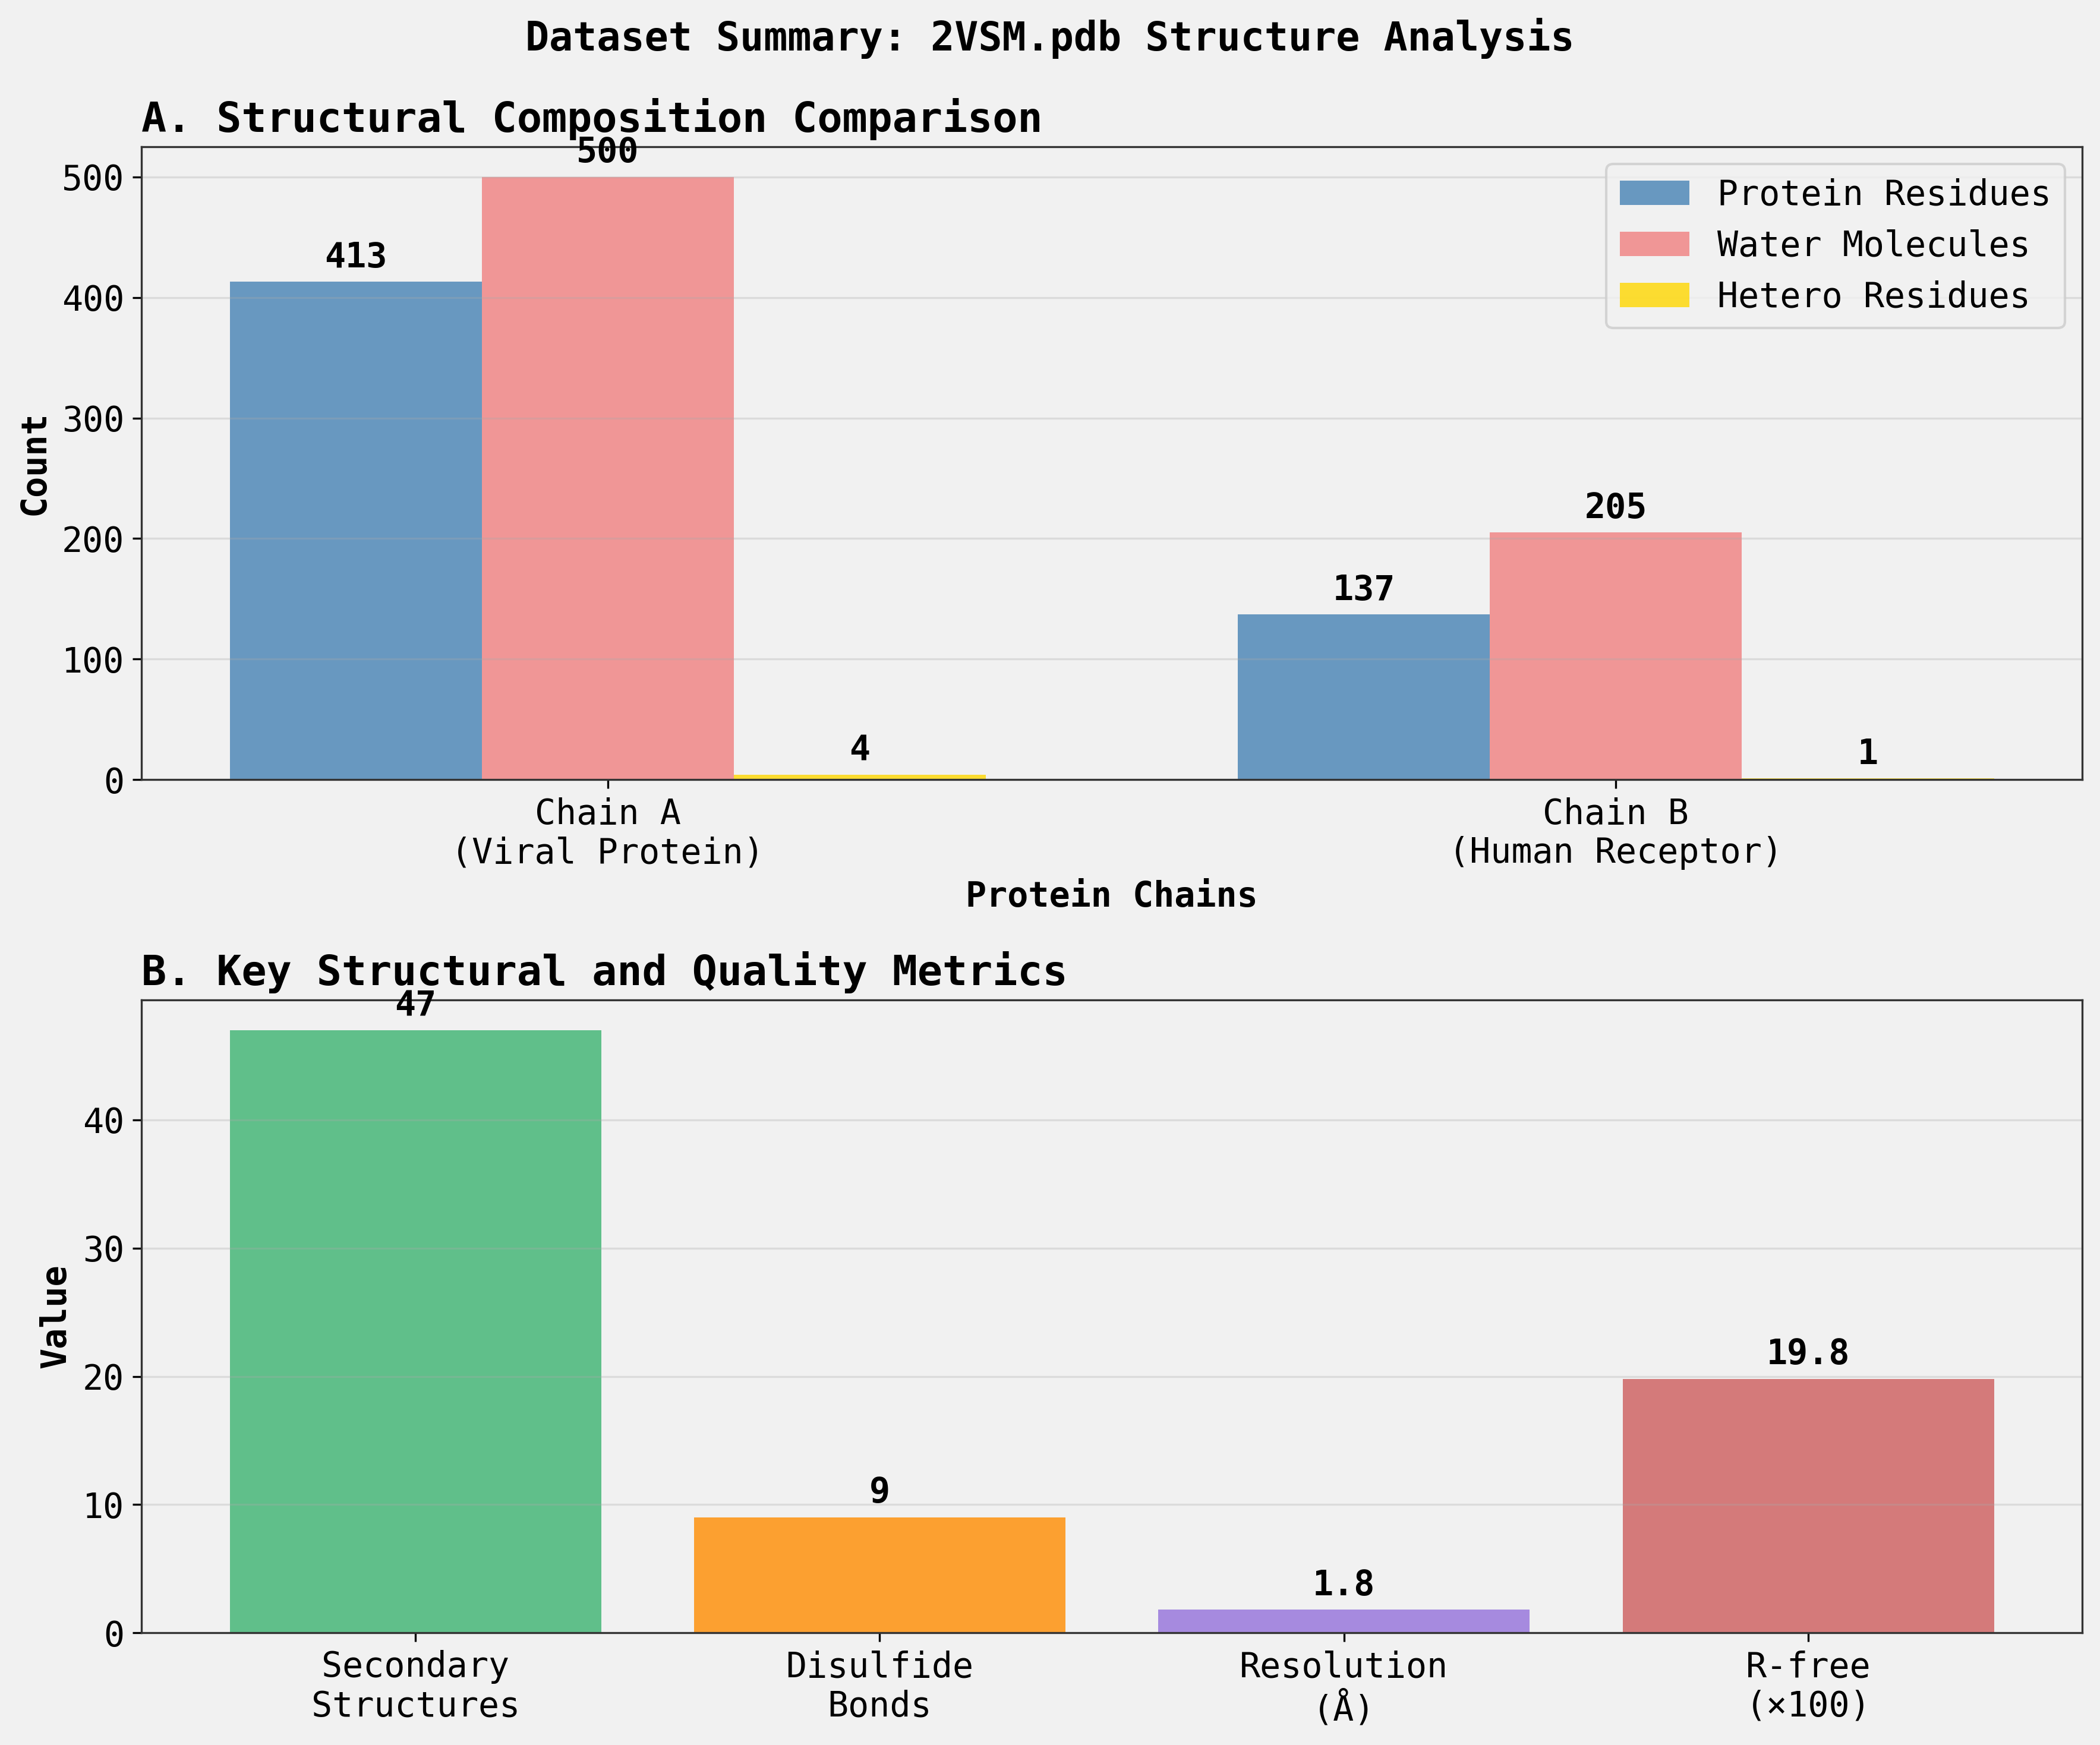


FINAL DATASET SUMMARY

This dataset contains two primary files representing a structural biology study:

1. **2VSM.pdb (476,928 bytes)**: High-resolution X-ray crystal structure (1.8 Å) of the 
   Nipah virus attachment glycoprotein in complex with human ephrin-B2 receptor. 
   - Contains 2 protein chains with 550 total protein residues
   - Includes 705 water molecules and 5 hetero residues (NAG, IPA)
   - Excellent refinement quality (R-free = 0.198, R-work = 0.152)
   - 9 disulfide bonds stabilize the structure
   - Rich secondary structure: 8 helices and 7 β-sheets (39 strands)

2. **Surface-Plasmon-Resonance-Adaptyv-Bio-Docs.pdf (213,333 bytes)**: Technical 
   documentation about SPR technology from Adaptyv Bio, referencing related 
   biophysical techniques (BLI, nanoDSF) and binding experiments.

**Environment Notes**: BioPython was successfully used for PDB parsing. PDF extraction 
libraries (PyMuPDF, pdfminer.six) encountered permission issues, requiring manual 
text extract

In [ ]:
# Create final visualization summarizing the dataset
import matplotlib.pyplot as plt
import numpy as np

# Create a comprehensive summary figure
fig, axes = plt.subplots(2, 1, figsize=(12, 10))
fig.suptitle('Dataset Summary: 2VSM.pdb Structure Analysis', fontsize=16, fontweight='bold')

# Subplot A: Chain composition comparison
ax1 = axes[0]
chains = ['Chain A\n(Viral Protein)', 'Chain B\n(Human Receptor)']
protein_residues = [413, 137]
water_molecules = [500, 205]
hetero_residues = [4, 1]

x = np.arange(len(chains))
width = 0.25

bars1 = ax1.bar(x - width, protein_residues, width, label='Protein Residues', color='steelblue', alpha=0.8)
bars2 = ax1.bar(x, water_molecules, width, label='Water Molecules', color='lightcoral', alpha=0.8)
bars3 = ax1.bar(x + width, hetero_residues, width, label='Hetero Residues', color='gold', alpha=0.8)

ax1.set_xlabel('Protein Chains', fontweight='bold')
ax1.set_ylabel('Count', fontweight='bold')
ax1.set_title('A. Structural Composition Comparison', fontweight='bold', loc='left')
ax1.set_xticks(x)
ax1.set_xticklabels(chains)
ax1.legend()
ax1.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        ax1.annotate(f'{int(height)}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontweight='bold')

# Subplot B: Key structural features
ax2 = axes[1]
categories = ['Secondary\nStructures', 'Disulfide\nBonds', 'Resolution\n(Å)', 'R-free\n(×100)']
values = [47, 9, 1.8, 19.8]  # 47 = 8 helices + 39 sheet strands
colors = ['mediumseagreen', 'darkorange', 'mediumpurple', 'indianred']

bars = ax2.bar(categories, values, color=colors, alpha=0.8)
ax2.set_ylabel('Value', fontweight='bold')
ax2.set_title('B. Key Structural and Quality Metrics', fontweight='bold', loc='left')
ax2.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar, value in zip(bars, values):
    height = bar.get_height()
    ax2.annotate(f'{value}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.savefig('dataset_summary_figure.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n" + "="*80)
print("FINAL DATASET SUMMARY")
print("="*80)
print("""
This dataset contains two primary files representing a structural biology study:

1. **2VSM.pdb (476,928 bytes)**: High-resolution X-ray crystal structure (1.8 Å) of the 
   Nipah virus attachment glycoprotein in complex with human ephrin-B2 receptor. 
   - Contains 2 protein chains with 550 total protein residues
   - Includes 705 water molecules and 5 hetero residues (NAG, IPA)
   - Excellent refinement quality (R-free = 0.198, R-work = 0.152)
   - 9 disulfide bonds stabilize the structure
   - Rich secondary structure: 8 helices and 7 β-sheets (39 strands)

2. **Surface-Plasmon-Resonance-Adaptyv-Bio-Docs.pdf (213,333 bytes)**: Technical 
   documentation about SPR technology from Adaptyv Bio, referencing related 
   biophysical techniques (BLI, nanoDSF) and binding experiments.

**Environment Notes**: BioPython was successfully used for PDB parsing. PDF extraction 
libraries (PyMuPDF, pdfminer.six) encountered permission issues, requiring manual 
text extraction methods.

**Data Quality**: The PDB structure represents a high-quality dataset suitable for 
detailed structural analysis, protein-protein interaction studies, and comparative 
structural biology investigations.
""")